In [1]:
!pip install pandas_datareader

In [2]:
import pandas as pd
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, kstest, norm, t, cauchy, chi2

# Question 1

***
(a) If the growth rate was a constant r, then the world’s GDP would grow as
GDPk = GDP0(1 + r)^k
***

/opt/conda/lib/python3.10/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


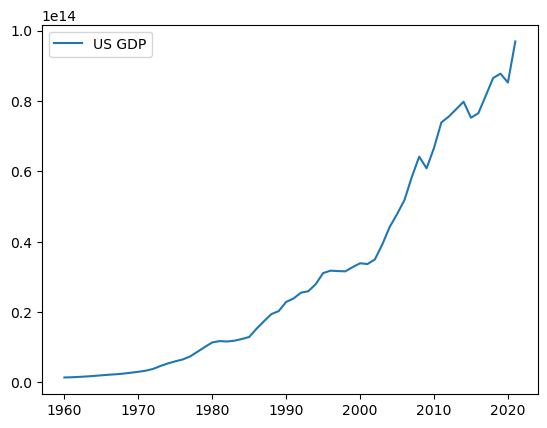

In [3]:
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='WLD', start='1960' , end='2021')
time = np.arange(1960, 2022)
gdp = gdp_data.iloc[:, 0].astype(float).to_numpy()
gdp = np.flip(gdp)
plt.plot(time, gdp, label='US GDP')
plt.legend()
plt.show()

***
Answer: Applying a log function to the data makes it a linear distribution
***

***
(b) Apply this transformation f(−) to the GDP data, and perform a regression against the time variable.
On the same plot, display your regression line, a scatter-plot of the (transformed) data points, and
your R2 value.
***

In [4]:
log_data = np.log(gdp)

In [5]:
def linear_model(x, beta0, beta1):
    """
    Returns a linear combination of inputs
    
    Input:
    x: x values of the data
    beta0: intercept
    beta1: slope
    """
    return beta0 + beta1 * x

In [6]:
params = linregress(time, log_data)
params

LinregressResult(slope=0.07156635288409492, intercept=-112.01450478870926, rvalue=0.9826894064474254, pvalue=1.2172770550360432e-45, stderr=0.001741808111989584, intercept_stderr=3.4672091631615607)

In [7]:
predictions = linear_model(time, params[1], params[0])

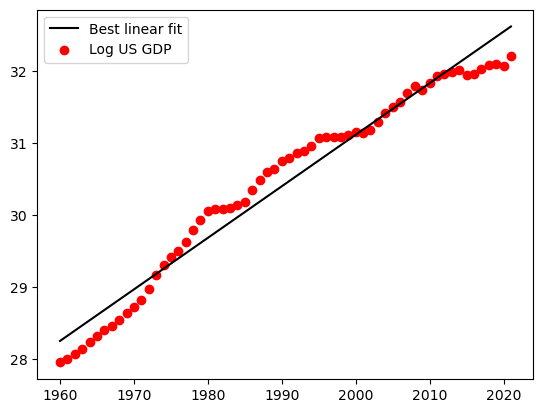

In [8]:
plt.plot(time, predictions, color='black', label='Best linear fit')
plt.scatter(time, log_data, label='Log US GDP', color='red')
plt.legend()
plt.show()

In [9]:
r_squared = params[2]**2
r_squared

0.9656784695439933

***
(c) Compute the residuals of your regression (i.e. the difference between the model and the observations),
and print their mean and their standard deviation σˆ. Perform a KS-test to determine whether we
can reject the null hypothesis that the residuals are sampled from a normal distribution with mean
0 and standard deviation σˆ. Take α = 99%.
***

In [10]:
residuals = predictions - log_data
residuals.mean(), residuals.std()

(-7.449238358775244e-15, 0.24144627148321077)

In [11]:
# Testing for null hypothesis that the residuals belong to a normal distribution of zero mean and std
kstest_data = kstest(residuals, 'norm', args=(0,residuals.std()))
kstest_data

KstestResult(statistic=0.13053964663293083, pvalue=0.2211569155807408, statistic_location=0.2403236454285107, statistic_sign=-1)

***
Answer: At confidence level 99%, we fail to reject the null hypothesis.
***

***
(d) You will now apply the inverse of the transformation f(−) to your linear model in order to get a non-linear model for the GDP. On the same plot, display your (non-linear) model and a scatter-plot of the (original) data points
***

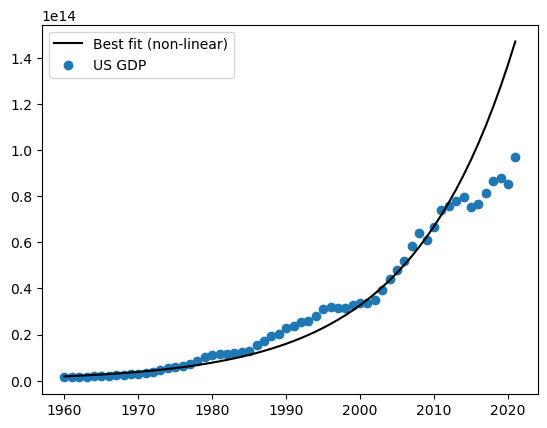

In [12]:
# Plotting original data with non-linear model params
plt.plot(time, np.exp(predictions), color='black', label='Best fit (non-linear)')
plt.scatter(time, gdp, label='US GDP')
plt.legend()
plt.show()

In [13]:
intercept = params[1]
b = np.exp(intercept)
b

2.2527794568496475e-49

In [14]:
slope = params[0]
slope

0.07156635288409492

***
(e) What is the relationship between the slope of the regression and the long-term growth rate of the
world GDP? Compute the long-term growth rate of the world GDP.
***


Answer: After doing the log transformation we get a linear model in the form of 
- y = a*x + b
- Where y is the log(GDP_k), a is log(1+r), x = k, b = log(GDP_0)
- The slope is the `a` term so after doing the inverse transform, the relationship becomes:
- rate `r` = exp(a) -1


In [15]:
rate = np.exp(slope)-1
rate*100

7.418942390303673

***
(f) What do you observe since approximately 2015?
***

Answer:
The growth rate seems to be different for 2015 onwards, it seems to have slowed down.
Testing that by diving the data into pre and post 2015 periods and getting growth rates.

In [16]:
# Splitting dataset on 2015
data = gdp_data.reset_index()
data.sort_index(ascending=False,inplace=True)
data['year'] = pd.to_numeric(data.year)
data_pre2015 = data[data.year<2015]
data_from2015 = data[data.year>=2015]

In [17]:
data_pre2015.shape

(55, 3)

In [18]:
data_from2015.shape

(7, 3)

In [19]:
# Transforming the data pre-2015 to compute growth rate
log_data = np.log(data_pre2015['NY.GDP.MKTP.CD'])
params = linregress(data_pre2015['year'], log_data)
predictions = linear_model(data_pre2015['year'], params[1], params[0])
residuals = predictions - log_data
# Testing for null hypothesis that the residuals belong to a normal distribution of zero mean and std
kstest_data = kstest(residuals, 'norm', args=(0,residuals.std()))
kstest_data

KstestResult(statistic=0.15498684730669254, pvalue=0.12787130445113082, statistic_location=0.11733717968369461, statistic_sign=-1)

***
Answer:
With confidence at 0.99, we cannot reject the null hypothesis.
***

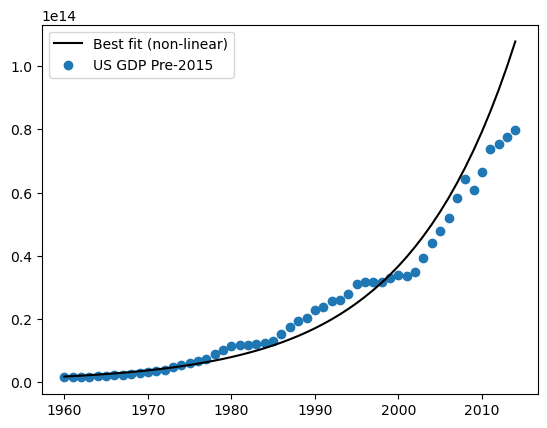

In [20]:
# Plotting original data with non-linear model params
plt.plot(data_pre2015['year'], np.exp(predictions), color='black', label='Best fit (non-linear)')
plt.scatter(data_pre2015['year'], data_pre2015['NY.GDP.MKTP.CD'], label='US GDP Pre-2015')
plt.legend()
plt.show()

In [21]:
# getting the rate
(np.exp(params[0])-1)*100

8.008695869212602

In [22]:
# Transforming the data from 2015 onwards to compute growth rate
log_data = np.log(data_from2015['NY.GDP.MKTP.CD'])
params = linregress(data_from2015['year'], log_data)
predictions = linear_model(data_from2015['year'], params[1], params[0])
residuals = predictions - log_data
# Testing for null hypothesis that the residuals belong to a normal distribution of zero mean and std
kstest_data = kstest(residuals, 'norm', args=(0,residuals.std()))
kstest_data

KstestResult(statistic=0.24966406228682358, pvalue=0.6901190323031343, statistic_location=-0.002779250318425852, statistic_sign=1)

***
Answer:
We cannot reject the null hypothesis. 
The linear model fits the transformed data well.
***

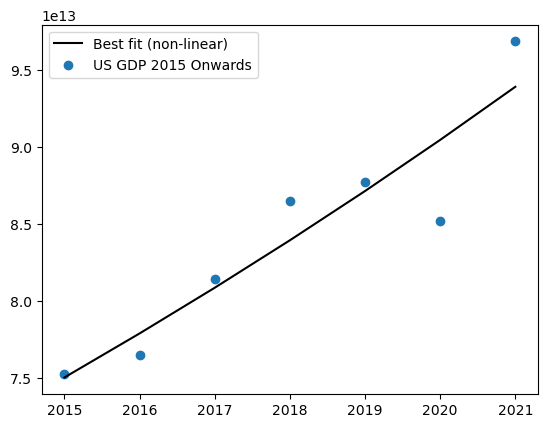

In [23]:
# Plotting original data with non-linear model params
plt.plot(data_from2015['year'], np.exp(predictions), color='black', label='Best fit (non-linear)')
plt.scatter(data_from2015['year'], data_from2015['NY.GDP.MKTP.CD'], label='US GDP 2015 Onwards')
plt.legend()
plt.show()

In [24]:
# getting the rate
(np.exp(params[0])-1)*100

3.8209058066764

***
As suspected the growth rate from 2015 onwards has reduced. The growth rate before 2015 conforms with the exponential line.
***

# Question 2

***
(a) Generate 10000 sets of error vectors εi and use them to perform 10000 linear regression of the Ndimensional vectors (yi) against (xi).
***

In [25]:
N = 200
a = 0.5
b = 2
repetitions = 10000

In [26]:
beta1_hat, beta0_hat = [], []
ys = []
x = np.linspace(-5, 5, N)
ssx = (x - x.mean())**2
epsilon_std = 1/5
epsilon_var = epsilon_std**2 # variance of the normally distributed epsilon term
for i in range(repetitions):    
    epsilon = norm.rvs(0, epsilon_std, N)
    y = a*x + b + epsilon
    ys.append(y)
    params = linregress(x, y)
    beta1_hat.append(params[0]) # slope 
    beta0_hat.append(params[1]) # intercept

len(beta1_hat), len(beta0_hat)

(10000, 10000)

In [27]:
np.mean(beta1_hat), np.mean(beta0_hat)

(0.4999535460719628, 1.9999345347509039)

In [28]:
x.mean(), x.var()

(1.4210854715202004e-16, 8.41708542713568)

In [29]:
np.sum(ssx)

1683.4170854271358

***
(b) Collect the slopes and the intercepts of these 10000 linear regressions and plot their histograms
against their respective theoretical densities given in the lecture. What do you observe?
***

In [30]:
# getting theoretic densities for slope
variance = epsilon_var / ssx.sum()
x_values = np.linspace(min(beta1_hat), max(beta1_hat), repetitions)
slope_distribution = norm.pdf(x_values, a, variance**0.5)

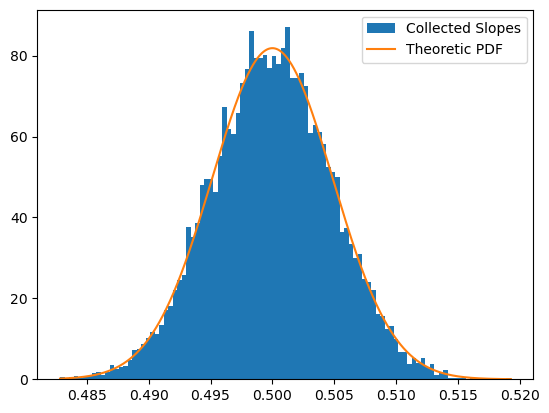

In [31]:
plt.hist(beta1_hat, bins=int(len(beta1_hat)**0.5), density=True, label='Collected Slopes')
plt.plot(x_values, slope_distribution, label='Theoretic PDF')
plt.legend()
plt.show()

***
Observation: Since the PDF and the histograms follow a similar pattern having similar mean and standard deviation, beta1_hat may be an unbiased estimator of the slope.
***

In [32]:
# getting theoretic densities for intercept
variance = epsilon_var*np.sum(x**2) / (N*ssx.sum())
x_values = np.linspace(min(beta0_hat), max(beta0_hat), repetitions)
intercept_distribution = norm.pdf(x_values, b, variance**0.5)

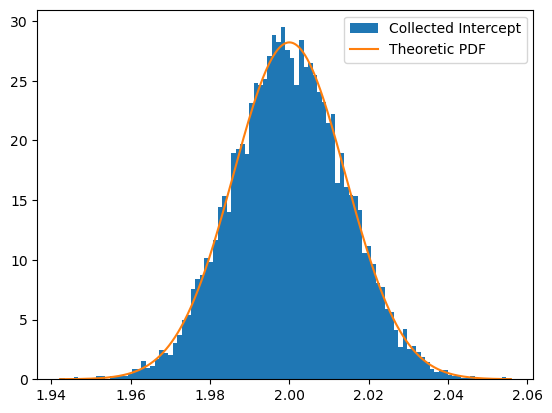

In [33]:
plt.hist(beta0_hat, bins=int(len(beta0_hat)**0.5), density=True, label='Collected Intercept')
plt.plot(x_values, intercept_distribution, label='Theoretic PDF')
plt.legend()
plt.show()

***
Observation: Since the PDF and the histograms follow a similar pattern having similar mean and standard deviation, beta0_hat is an unbiased estimator of the intercept.
***

***
(c) For each of the 10000 regression, compute the test statistic for the slope and for the intercept (given
in the lecture) and plot their histograms against their theoretical density (also given in the lecture).
What do you observe?
***

In [34]:
# theoretical distribution of the t-statistic
x_values = np.linspace(-4, 4, 100)
t_pdf = t.pdf(x_values, df=N-2)

In [35]:
# # run experiment collecting data to compute the t-statistics for slope and intercept
beta1_hat, beta0_hat = [], []
distances = []
y_true = a*x + b
# calculating for t statistic test
for i in range(repetitions):    
    epsilon = norm.rvs(0, epsilon_std, N)
    y_obs = y_true + epsilon    
    params = linregress(x, y_obs)
    beta1_hat.append(params[0]) # slope 
    beta0_hat.append(params[1]) # intercept
    y_hat = params[0]*x + params[1]

    sse = (y_obs - y_hat)**2
    distances.append(sse.sum())

distances = np.array(distances)
beta1_hat = np.array(beta1_hat)
beta0_hat = np.array(beta0_hat)

In [36]:
# testing for the slope
numerator = beta1_hat - a
denom = distances/(
                (N-2) * ssx.sum()
            )
denom = denom**0.5
b1_test_values = numerator/denom

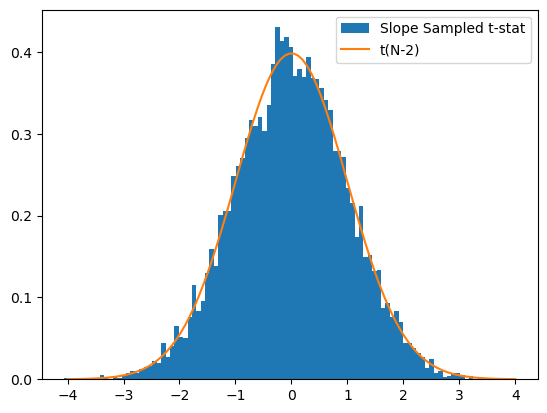

In [37]:
plt.hist(b1_test_values, bins=int(len(b1_test_values)**0.5), density=True, label='Slope Sampled t-stat') 
plt.plot(x_values, t_pdf, label='t(N-2)')
plt.legend()
plt.show()

***
Observation: While testing for the slope beta1, we find the t statisitc for the slope using the observed data of the experiments' beta1_hat. In the figure above, the distribution can be seen tracing the t distribution with N-2 degrees of freedom.
***

In [38]:
# Test statistic for B0
numerator = (beta0_hat - b)*( N*(N-2)*ssx.sum())**0.5

denom = distances * np.sum(x**2)                        
denom**=0.5

b0_test_values = numerator/denom

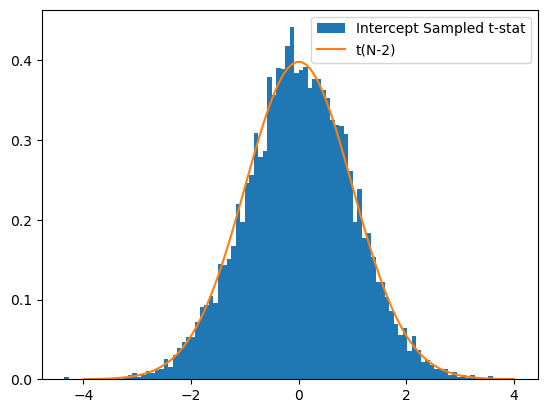

In [39]:
plt.hist(b0_test_values, bins=int(len(b0_test_values)**0.5), density=True, label='Intercept Sampled t-stat') 
plt.plot(x_values, t_pdf, label='t(N-2)')
plt.legend()
plt.show()

***
Observation: While testing for the intercept beta0, we find the t statisitc for the intercept using the observed data of the experiments' betao_hat. In the figure above, the distribution can be seen tracing the t distribution with N-2 degrees of freedom.
***

***
(d) Take the last of your regressions and perform the following two tests with α = 99% (you may use either p-values or critical regions but make sure you think about whether this is a one-sided or two-sided test).
***

In [40]:
alpha = 0.99
critical_value = (1-alpha)/2 # for 2 sided test
t_dist = t(N-2)
pdf_values = t_dist.pdf(x_values)

In [41]:
params

LinregressResult(slope=0.5019020110380027, intercept=2.014815203723551, rvalue=0.9916984620943734, pvalue=2.3794422252875664e-178, stderr=0.0046248512884376185, intercept_stderr=0.013417717382631327)

***
Null Hypothesis: 
- a is 0.5 assuming b=2
***

In [42]:
# testing by getting params of last run regression for the slope
hypothesis_a = 1/2
sse_hypothesis = (y_obs - b - hypothesis_a*x)**2
den = sse_hypothesis.sum()/(
                            (N-2) * ssx.sum()                     
                            )
den = den**0.5
val = (params[0] - hypothesis_a)/den
val, epsilon_var/ssx.sum(), t_dist.pdf(val), t_dist.cdf(val)

(0.40982461093557965,
 2.3761194029850748e-05,
 0.3662029414678859,
 0.6588111698892554)

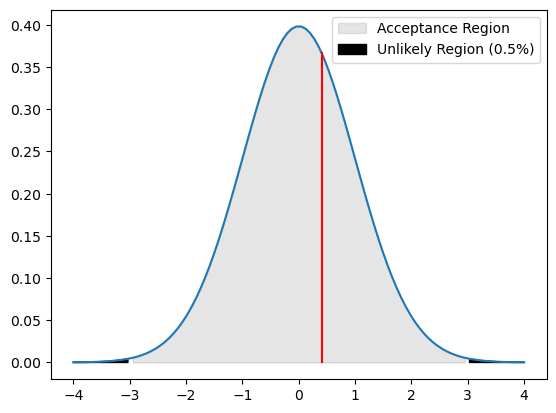

In [43]:
plt.plot(x_values, pdf_values)
plt.fill_between(x_values, pdf_values,
                        where=pdf_values >= critical_value, 
                        color=(0, 0, 0, 0.1), label='Acceptance Region')
plt.fill_between(x_values, pdf_values,
                        where=pdf_values < critical_value, 
                        color='k', label='Unlikely Region (0.5%)')
pd = t_dist.pdf(val)
plt.plot([val, val], [0, pd], color='r')
plt.legend()

***
Result:
For a 2 sided test, since the value does not fall in the critical region, we fail to reject the null hypothesis.
***

***
Null Hypothesis
- b is 2 assuming a=0.5
***

In [44]:
# testing by getting params of last run regression for the intercept
hypothesis_b = 2
num = (params[1] - hypothesis_b)*(N*(N-2)*ssx.sum())**0.5
sse_hypothesis = (y_obs - hypothesis_b - a*x)**2
den = sse_hypothesis.sum() * np.sum(x**2)
den = den**0.5

val = num/den
val, (epsilon_var*np.sum(x**2)/(N*ssx.sum())), t.pdf(val, df=N-2), t.cdf(val, df=N-2)

(1.1003016459974082,
 0.00020000000000000004,
 0.21724320281254228,
 0.8637316861892204)

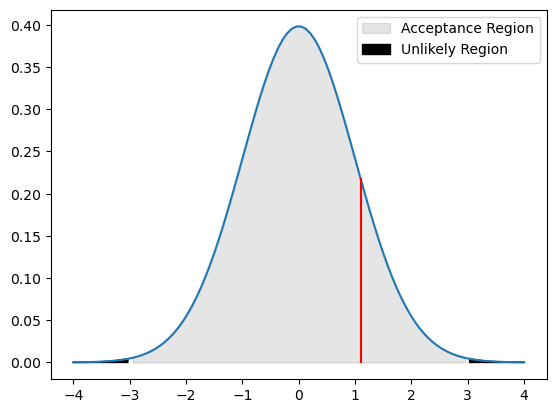

In [45]:
plt.plot(x_values, pdf_values)
plt.fill_between(x_values, pdf_values,
                        where=pdf_values >= critical_value, 
                        color=(0, 0, 0, 0.1), label='Acceptance Region')
plt.fill_between(x_values, pdf_values,
                        where=pdf_values < critical_value, 
                        color='k', label='Unlikely Region')
pd = t_dist.pdf(val)
plt.plot([val, val], [0, pd], color='r')
plt.legend()

***
Result:
For a 2 sided test, since the value does not fall in the critical region, we fail to reject the null hypothesis.
***

***
Conclusion: The collected slope and intercept are unbiased estimators of the true slope and intercept.
***

***
(e) Change the model. Perform another 10000 regressions based on this model. Collect the slopes and intercepts of these regressions as well as the associated statistics. Plot their histograms.
***

The Cauchy distribution has heavy tails and does not have a finite mean and variance (undefined). Since MLE assumes the moments are finite, using MLE is not guaranteed to give us unbiased estimators of the true model.

In [46]:
beta1_hat, beta0_hat = [], []
distances = []
y_true = a*x + b

for i in range(repetitions):    
    epsilon = cauchy.rvs(0, epsilon_std, N)
    y_obs = y_true + epsilon    
    params = linregress(x, y_obs)
    beta1_hat.append(params[0]) # slope 
    beta0_hat.append(params[1]) # intercept
    y_hat = params[0]*x + params[1]

    sse = (y_obs - y_hat)**2
    distances.append(sse.sum())

distances = np.array(distances)
beta1_hat = np.array(beta1_hat)
beta0_hat = np.array(beta0_hat)
params

LinregressResult(slope=0.4776395668598925, intercept=1.917409993085859, rvalue=0.39767342687516655, pvalue=5.510431305360827e-09, stderr=0.07831771263303455, intercept_stderr=0.22721702139728528)

### Testing for slope


In [47]:
# theoretical distribution of the t-statistic
x_values = np.linspace(-4, 4, 100)
t_pdf = t.pdf(x_values, df=N-2)

In [48]:
# testing for the slope
numerator = beta1_hat - a
denom = distances/(
                (N-2) * ssx.sum()                     
            )
denom = denom**0.5
b1_test_values = numerator/denom

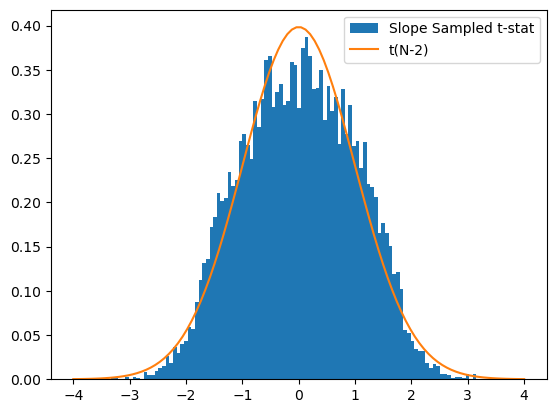

In [49]:
plt.hist(b1_test_values, bins=int(len(b1_test_values)**0.5), density=True, label='Slope Sampled t-stat') 
plt.plot(x_values, t_pdf, label='t(N-2)')
plt.legend()
plt.show()

***
Null Hypothesis:
- a is 0.5 assuming b=2
***

In [50]:
# testing by getting params of last run regression for the slope
hypothesis_a = 1/2
sse_hypothesis = (y_obs - b - hypothesis_a*x)**2
den = sse_hypothesis.sum()/(
                            (N-2) * ssx.sum()                     
                            )
den = den**0.5
val = (params[0] - hypothesis_a)/den
val, t.pdf(val, df=N-2), t.cdf(val, df=N-2)

(-0.28535536817551604, 0.3824672650814385, 0.3878350884777632)

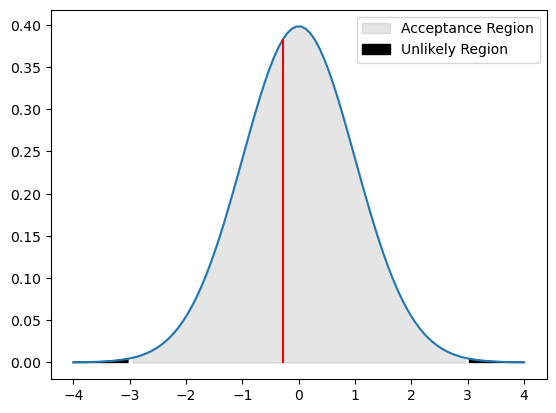

In [51]:
plt.plot(x_values, pdf_values)
plt.fill_between(x_values, pdf_values,
                        where=pdf_values >= critical_value, 
                        color=(0, 0, 0, 0.1), label='Acceptance Region')
plt.fill_between(x_values, pdf_values,
                        where=pdf_values < critical_value, 
                        color='k', label='Unlikely Region')
pd = t_dist.pdf(val)
plt.plot([val, val], [0, pd], color='r')
plt.legend()

***
Result:
For a 2 sided test, since the value does not fall in the critical region, we fail to reject the nulll hypothesis.
***

***
Observation:
Testing for slope using the T statistic, we see the sampled slope T statistic nearly traces the Student's T distribution with N-2 degrees of freedom.
To test the slope parameter of the model we set the null hypothesis for slope. We test the likelhood of the slope being 1/2 for the observed model. 
Since the statistic value does not fall in the critical region, we fail to reject the null hypothesis.
***

***
Conclusion: In this case we can say that collected slope must be an unbiased estimator of the true slope.
***

### Testing for intercept


In [52]:
# theoretical distribution of the t-statistic
x_values = np.linspace(-4, 4, 100)
t_pdf = t.pdf(x_values, df=N-2)

In [53]:
# Test statistic for B0
numerator = (beta0_hat - b)*( N*(N-2)*ssx.sum())**0.5

denom = distances * np.sum(x**2)                        
denom**=0.5

b0_test_values = numerator/denom

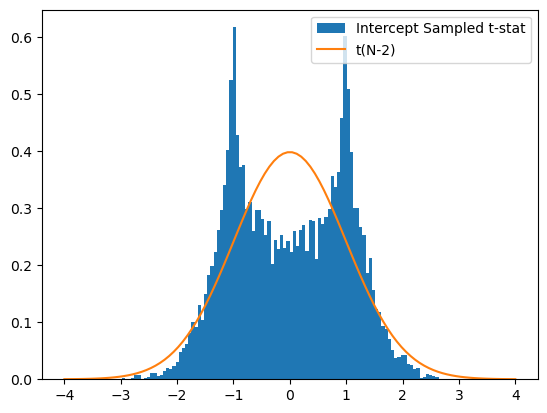

In [54]:
plt.hist(b0_test_values, bins=int(len(b0_test_values)**0.5), density=True, label='Intercept Sampled t-stat') 
plt.plot(x_values, t_pdf, label='t(N-2)')
plt.legend()
plt.show()

In [55]:
# testing by getting params of last run regression for the intercept
hypothesis_b = 2
num = (params[1] - hypothesis_b)*(N*(N-2)*ssx.sum())**0.5
sse_hypothesis = (y_obs - hypothesis_b - a*x)**2
den = sse_hypothesis.sum() * np.sum(x**2)
den = den**0.5

val = num/den
val, t.pdf(val, df=N-2), t.cdf(val, df=N-2)

(-0.36328918568199403, 0.37287879578071226, 0.35838821609887017)

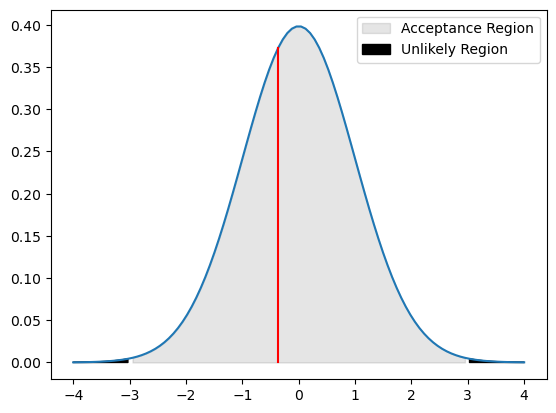

In [56]:
plt.plot(x_values, pdf_values)
plt.fill_between(x_values, pdf_values,
                        where=pdf_values >= critical_value, 
                        color=(0, 0, 0, 0.1), label='Acceptance Region')
plt.fill_between(x_values, pdf_values,
                        where=pdf_values < critical_value, 
                        color='k', label='Unlikely Region')
pd = t_dist.pdf(val)
plt.plot([val, val], [0, pd], color='r')
plt.legend()

***
Result:
For a 2 sided test, since the value does not fall in the critical region, we fail to reject the null hypothesis.
***

***
Observation:
- Testing for intercept using the T statistic, we see the sampled intercept T statistic does not trace the Student's T distribution with N-2 degrees of freedom.
The mean of the intercept sampled t statistic does not even coincide with that of the T distribution (this is impacted by the aforementioned properties of the Cauchy distribution).
- To test the intercept parameter of the model we set the null hypothesis for the intercept. We test the likelhood of the intercept being equal to 2. 
Since the statistic value does not fall in the critical region, we fail to reject the null hypothesis.
***

***
Conclusion: In this case we can say that collected intercept must be an unbiased estimator of the true intercept.
***